# Project - II

## Problem Statement
A retail company “XYZ Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Aim : Exploratory Data Analysis and Feature Engineering on Black Firday dataset from Kaggle.

In [1]:
# importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Accessing the dataset using pandas.
data_train = pd.read_csv('train.csv')

In [3]:
data_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data_train.shape

(550068, 12)

In [5]:
# importing test data.
data_test = pd.read_csv('test.csv')
data_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
data_test.shape

(233599, 11)

In [7]:
# Merging train and test data.
data = pd.concat([data_train,data_test])

In [8]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
data.drop(['User_ID'],axis=1,inplace=True)

In [12]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
data['Gender'].value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

In [14]:
# For Gender F->0, M->1
data['Gender'] = data['Gender'].map({'F':0,'M':1})

In [15]:
data['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [16]:
age_enc = {'0-17':1,
           '18-25':2,
           '26-35':3,
           '36-45':4,
           '46-50':5,
           '51-55':6,
           '55+':7
          }
data['Age'] = data['Age'].map(age_enc)

In [17]:
data.sample(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
109877,P00127042,0,3,0,A,2,1,4,5.0,NaN,NaN
134604,P00105442,1,4,7,B,3,0,11,NaN,NaN,6070.0
135540,P00117442,1,3,1,C,2,1,5,14.0,NaN,NaN
100183,P00057642,1,3,0,B,3,0,1,15.0,16.0,19621.0
132439,P00160942,0,4,7,C,2,0,1,16.0,NaN,4426.0


In [18]:
# This time using sklearn.labelEncoder()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['City_Category'] = le.fit_transform(data['City_Category'])

In [19]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,2,4+,0,8,NaN,NaN,7969.0


In [20]:
data['City_Category'].value_counts()

1    329739
2    243684
0    210244
Name: City_Category, dtype: int64

In [21]:
data['Stay_In_Current_City_Years'].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe_data = pd.DataFrame(ohe.fit_transform(data[['Stay_In_Current_City_Years']]).toarray())
new_data = data.join(ohe_data)

In [23]:
new_data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0,1,2,3,4
0,P00069042,0,1,10,0,2,0,3,NaN,NaN,8370.0,0.0,0.0,1.0,0.0,0.0
0,P00128942,1,5,7,1,2,1,1,11.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0,0.0,0.0,1.0,0.0,0.0
1,P00113442,1,3,17,2,0,0,3,5.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0
2,P00087842,0,1,10,0,2,0,12,NaN,NaN,1422.0,0.0,0.0,1.0,0.0,0.0


In [24]:
# For missing values.
new_data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
0                                  0
1                                  0
2                                  0
3                                  0
4                                  0
dtype: int64

In [25]:
# Handling Missing Values.
new_data['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

<AxesSubplot:>

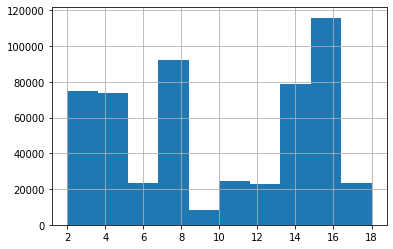

In [26]:
new_data['Product_Category_2'].hist()

In [27]:
new_data['Product_Category_2'].fillna(new_data['Product_Category_2'].mode()[0],inplace=True)

In [28]:
new_data['Product_Category_2'].isnull().sum()

0

<AxesSubplot:>

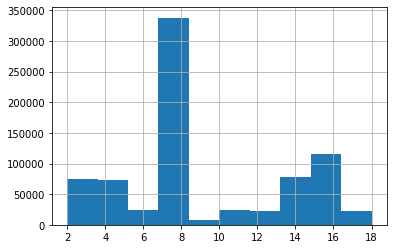

In [29]:
new_data['Product_Category_2'].hist()

In [30]:
# Likewise with Product_Category_3
new_data['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

<AxesSubplot:>

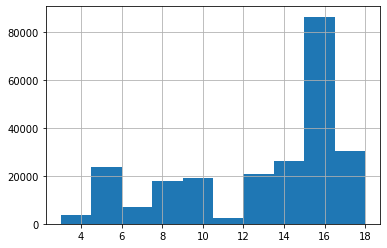

In [31]:
new_data['Product_Category_3'].hist()

In [32]:
new_data['Product_Category_3'].fillna(new_data['Product_Category_3'].mode()[0],inplace=True)

In [33]:
new_data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
0                                  0
1                                  0
2                                  0
3                                  0
4                                  0
dtype: int64

In [34]:
new_data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0,1,2,3,4
0,P00069042,0,1,10,0,2,0,3,8.0,16.0,8370.0,0.0,0.0,1.0,0.0,0.0
0,P00128942,1,5,7,1,2,1,1,11.0,16.0,NaN,0.0,0.0,1.0,0.0,0.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0,0.0,0.0,1.0,0.0,0.0
1,P00113442,1,3,17,2,0,0,3,5.0,16.0,NaN,0.0,0.0,1.0,0.0,0.0
2,P00087842,0,1,10,0,2,0,12,8.0,16.0,1422.0,0.0,0.0,1.0,0.0,0.0


In [35]:
new_data['Stay_In_Current_City_Years']=new_data['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\rckzs\AppData\Local\Temp\ipykernel_4560\2551377254.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_data['Stay_In_Current_City_Years']=new_data['Stay_In_Current_City_Years'].str.replace('+','')


In [36]:
new_data.sample(7)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0,1,2,3,4
200703,P00249542,1,4,0,1,2,0,1,5.0,15.0,11761.0,0.0,0.0,1.0,0.0,0.0
166485,P00205842,1,1,12,0,1,0,5,8.0,16.0,NaN,0.0,0.0,0.0,1.0,0.0
201894,P00268442,0,3,0,0,2,1,8,17.0,16.0,7965.0,0.0,0.0,1.0,0.0,0.0
382975,P00069542,1,2,20,2,4,0,5,8.0,16.0,7013.0,0.0,0.0,0.0,0.0,1.0
439707,P00297842,0,3,6,1,1,1,1,8.0,16.0,12024.0,0.0,1.0,0.0,0.0,0.0
62197,P00048742,0,3,7,0,3,1,5,8.0,16.0,NaN,0.0,1.0,0.0,0.0,0.0
508381,P00214642,1,2,4,1,4,0,11,13.0,16.0,4705.0,0.0,0.0,0.0,0.0,1.0


In [37]:
# Converting Stay_In_Currnet_City_Years into int value.
new_data['Stay_In_Current_City_Years']=new_data['Stay_In_Current_City_Years'].astype('int64')

In [38]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int32  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  0                           783667 non-null  float64
 12  1                           783667 non-null  float64
 13  2             

In [39]:
data=new_data.drop_duplicates()

C:\Users\rckzs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

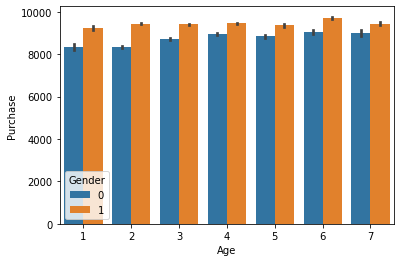

In [40]:
sns.barplot('Age','Purchase',hue='Gender',data=data)

# Outlier Detection

C:\Users\rckzs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

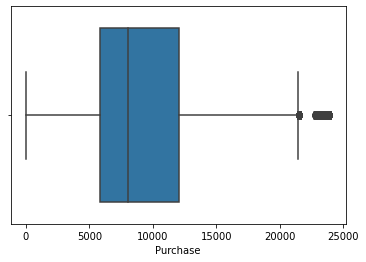

In [41]:
sns.boxplot(data['Purchase'])

C:\Users\rckzs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

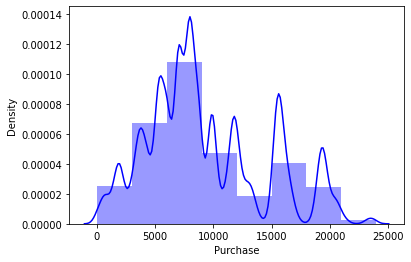

In [42]:
sns.distplot(data['Purchase'],bins=8,kde=True,color='blue')

# Train - Test split

In [43]:
test = data[data['Purchase'].isnull()]

In [44]:
train = data[~data['Purchase'].isnull()]

In [45]:
print(train.shape,test.shape)

(549955, 16) (229438, 16)


In [46]:
X = train.drop(['Purchase'],axis =1)

In [47]:
X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,0,1,2,3,4
0,P00069042,0,1,10,0,2,0,3,8.0,16.0,0.0,0.0,1.0,0.0,0.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,0.0,0.0,1.0,0.0,0.0
2,P00087842,0,1,10,0,2,0,12,8.0,16.0,0.0,0.0,1.0,0.0,0.0
3,P00085442,0,1,10,0,2,0,12,14.0,16.0,0.0,0.0,1.0,0.0,0.0
4,P00285442,1,7,16,2,4,0,8,8.0,16.0,0.0,0.0,0.0,0.0,1.0


In [48]:
Y= train['Purchase']

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(X,Y,test_size=0.3,random_state=42)

# Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [54]:
x_train.drop('Product_ID',axis=1,inplace=True)
x_test.drop('Product_ID',axis=1,inplace=True)

In [55]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

C:\Users\rckzs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\rckzs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\rckzs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [56]:
x_train_scaled

array([[-1.74676443, -1.1074504 ,  1.36824906, ..., -0.47660667,
        -0.45758258, -0.4274524 ],
       [ 0.57248704,  0.37052457, -0.93201971, ..., -0.47660667,
        -0.45758258, -0.4274524 ],
       [ 0.57248704, -1.1074504 , -0.93201971, ..., -0.47660667,
        -0.45758258,  2.33944176],
       ...,
       [-1.74676443,  2.58748704,  1.21489781, ..., -0.47660667,
        -0.45758258, -0.4274524 ],
       [-1.74676443, -1.1074504 , -0.62531721, ..., -0.47660667,
        -0.45758258,  2.33944176],
       [-1.74676443,  1.10951206, -0.3186147 , ..., -0.47660667,
        -0.45758258, -0.4274524 ]])

In [57]:
x_test_scaled

array([[ 0.57248704, -0.36846291,  0.90819531, ..., -0.47660667,
        -0.45758258,  2.33944176],
       [ 0.57248704,  2.58748704,  1.36824906, ..., -0.47660667,
        -0.45758258,  2.33944176],
       [ 0.57248704,  0.37052457, -1.23872221, ..., -0.47660667,
        -0.45758258, -0.4274524 ],
       ...,
       [ 0.57248704,  1.10951206,  0.60149281, ..., -0.47660667,
        -0.45758258,  2.33944176],
       [-1.74676443, -0.36846291, -0.16526345, ..., -0.47660667,
        -0.45758258, -0.4274524 ],
       [ 0.57248704, -0.36846291,  1.36824906, ..., -0.47660667,
        -0.45758258, -0.4274524 ]])